# South African Language Identiffication  Student Solution

© Explore Data Science Academy

---
### Honour Code

I **LEHLOHONOLO, RADEBE**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).


### Predict Overview: EA - South African Language Identiffication Challenge
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. Our task company is to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Unseen Data Predictions</a>

# Import librareis and modules

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eldonkakashi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
# Read the train data file
train_data = pd.read_csv('train_set.csv')

# Read the test data file
test_data = pd.read_csv('test_set.csv')

In [5]:
# Reset the index of the data
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [6]:
train_data_copy = train_data.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Previewing the Training and Test Data

In [7]:
# Display the first few rows of the train data
print(train_data.head())

# Check the dimensions of the train data (number of rows, number of columns)
print(train_data.shape)

# # Check the data types of the columns
print(train_data.dtypes)

# # Check summary statistics of the numeric columns
print(train_data.describe())

# # Count the number of occurrences of each language in the train data
language_counts = train_data['text'].value_counts()
print(language_counts)

  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
(33000, 2)
lang_id    object
text       object
dtype: object
       lang_id                                               text
count    33000                                              33000
unique      11                                              29948
top        xho  ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq      3000                                                 17
text
ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwa

In [8]:
train_data = train_data.drop_duplicates(subset=['lang_id', 'text'], keep='first')
test_data = test_data.drop_duplicates(subset=['index', 'text'], keep='first')

In [9]:
# Find duplicates
duplicates = train_data.duplicated()
duplicate_rows = train_data[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [lang_id, text]
Index: []


In [10]:
# Find rows with a high percentage of null values
null_percent = train_data.isnull().sum(axis=1) / train_data.shape[1] * 100
high_null_rows = train_data[null_percent > 90]
print("\nRows with > 90% Null Values:")
print(high_null_rows)


Rows with > 90% Null Values:
Empty DataFrame
Columns: [lang_id, text]
Index: []


In [11]:
test_data.tail(5)

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


### 3.2 Exploratory Data Analysis: Insights from Visualizations

### Class Distribution

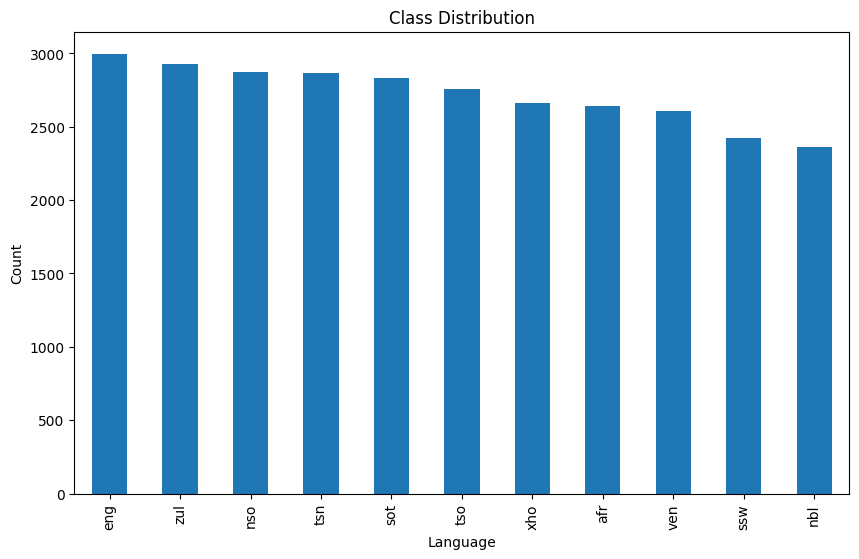

In [12]:
# Class Distribution
class_counts = train_data['lang_id'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

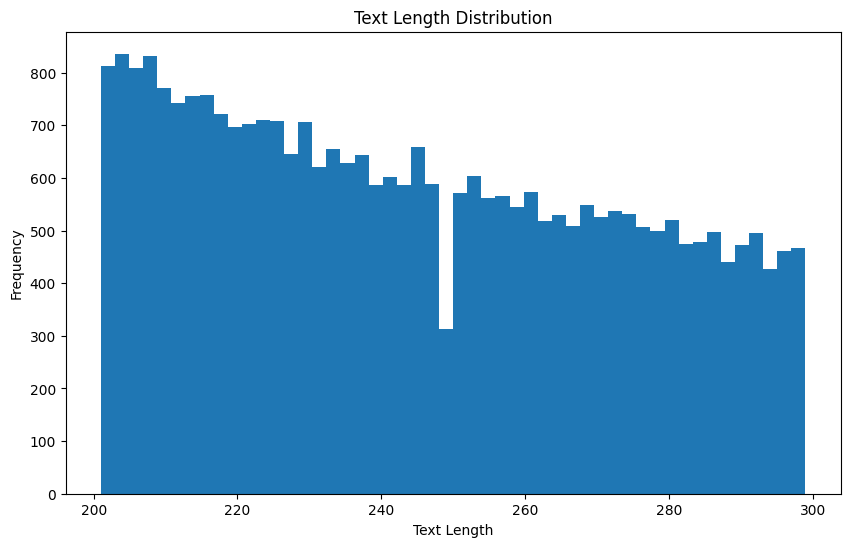

In [13]:
# Text Length Distribution
train_data['text_length'] = train_data['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
plt.hist(train_data['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

### 3.3 Word Cloud: Word Frequency Analysis

#### Word Frequency

In [14]:
# Word Frequency Analysis
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

#### Plotting the Wordcloud for each Sentiment

In [15]:
def generate_language_wordclouds(data):
    # Get unique languages in the dataset
    languages = data['lang_id'].unique()

    # Create a grid of subplots based on the number of languages
    num_languages = len(languages)
    num_cols = 3
    num_rows = (num_languages + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Generate word cloud for each language
    for i, language in enumerate(languages):
        # Get texts for the current language
        texts = data[data['lang_id'] == language]['text']
        text_combined = ' '.join(texts)

        # Generate word cloud for the language
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_combined)

        # Plot the word cloud in the corresponding subplot
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(wordcloud, interpolation='bilinear')
        axes[row, col].set_title(language)
        axes[row, col].axis('off')

    # Hide any empty subplots
    if num_languages < num_rows * num_cols:
        for i in range(num_languages, num_rows * num_cols):
            axes[i // num_cols, i % num_cols].axis('off')

    # Adjust spacing and layout
    plt.tight_layout()

    # Show the combined word clouds
    plt.show()


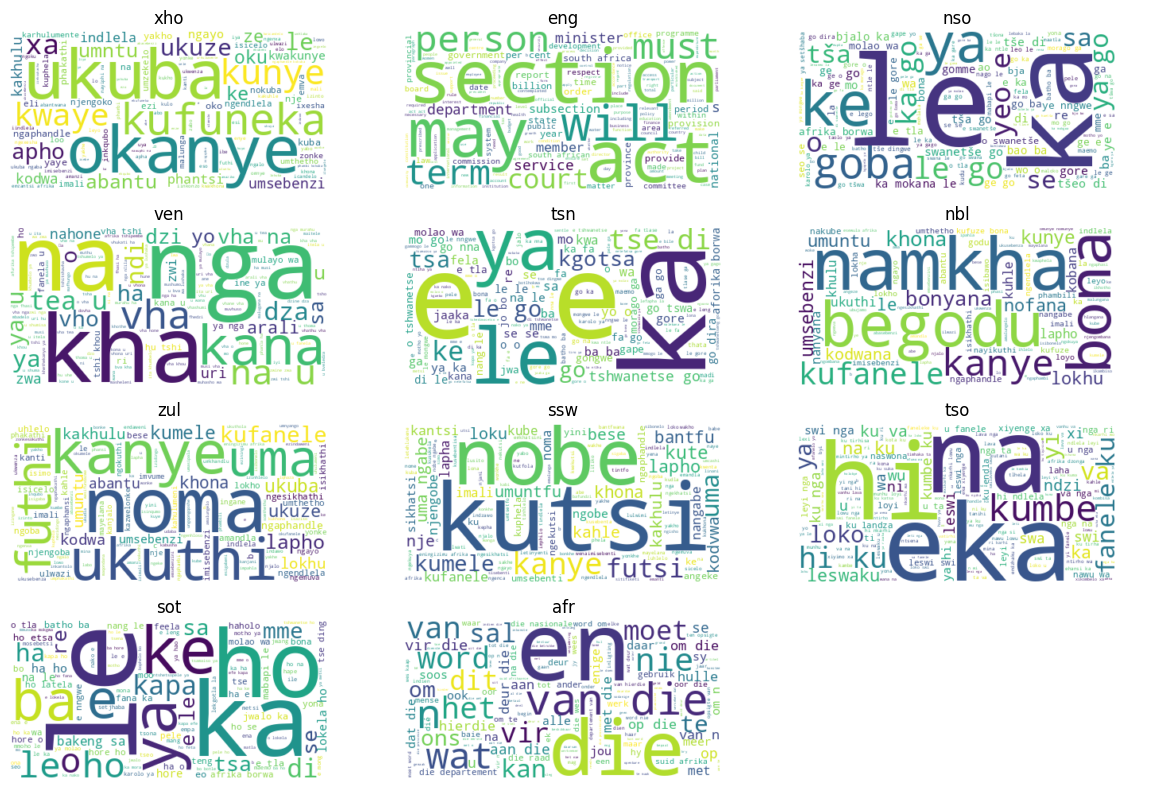

In [16]:
# Generate and display the language word clouds
generate_language_wordclouds(train_data)


#### Removing Noise

In [17]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove punctuation and special characters
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]
    
    # Replace 'š' with 's'
    tokens = [token.replace('š', 's') for token in tokens]
    
    # Get stop words for South African languages
    languages = ['english', 'zulu', 'xhosa', 'afrikaans', 'sotho_southern', 'ndebele_south', 'swati', 'venda', 'tsonga', 'tswana', 'sotho_northern', 'ndebele_north']
    stop_words = set(stopwords.words('english'))
    sa_stop_words = set()

    for language in languages:
        if language in stopwords.fileids():
            sa_stop_words.update(set(stopwords.words(language)))

    stop_words.update(sa_stop_words)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens if token.strip()]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text


In [18]:
# Apply text preprocessing to 'text' column
train_data['processed_text'] = train_data['text'].apply(preprocess_text)

In [19]:
# Display the preprocessed data
print(train_data[['lang_id', 'processed_text']].head())

  lang_id                                     processed_text
0     xho  umgaqosiseko wenza amalungiselelo kumaziko axh...
1     xho  idha iya kuba nobulumko bokubeka umsebenzi nap...
2     eng  province kwazulunatal department transport inv...
3     nso  netefatsa gore ba file dilo ka moka tse le dum...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [20]:
def get_word_count(text):
    tokens = word_tokenize(text)
    return len(tokens)

In [21]:
def get_average_word_length(text):
    tokens = word_tokenize(text)
    total_length = sum(len(token) for token in tokens)
    return total_length / len(tokens) if len(tokens) > 0 else 0

In [22]:
# Apply linguistic feature extraction functions to create new columns
train_data['word_count'] = train_data['processed_text'].apply(get_word_count)
train_data['average_word_length'] = train_data['processed_text'].apply(get_average_word_length)

# Display the updated dataset
print(train_data[['lang_id', 'processed_text', 'word_count', 'average_word_length']].head())

  lang_id                                     processed_text  word_count  \
0     xho  umgaqosiseko wenza amalungiselelo kumaziko axh...          24   
1     xho  idha iya kuba nobulumko bokubeka umsebenzi nap...          31   
2     eng  province kwazulunatal department transport inv...          23   
3     nso  netefatsa gore ba file dilo ka moka tse le dum...          33   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...          42   

   average_word_length  
0             8.166667  
1             7.096774  
2             8.043478  
3             5.151515  
4             4.666667  


In [23]:
# Define the number of common words to consider
num_common_words = 10

# Tokenize and count word frequencies for each text
word_frequencies = []
for text in train_data['processed_text']:
    tokens = word_tokenize(text)
    word_frequencies.append(Counter(tokens))

# Find the most common words
common_words = []
for frequencies in word_frequencies:
    common_words.append([word for word, count in frequencies.most_common(num_common_words)])

# Create a column for common words in train data
train_data['common_words'] = common_words

# Display the updated dataset
print(train_data[['lang_id', 'common_words']].head())


  lang_id                                       common_words
0     xho  [ikomishoni, umgaqosiseko, wenza, amalungisele...
1     xho  [idha, iya, kuba, nobulumko, bokubeka, umseben...
2     eng  [bridge, construction, tugela, province, kwazu...
3     nso  [go, ka, la, netefatsa, gore, ba, file, dilo, ...
4     ven  [ya, u, ndinganyiso, mbeu, nga, khomishini, mu...


In [24]:
# Define the language groups and subgroups
language_groups = {
    'bantu': ['nbl', 'xho', 'zul', 'tsn', 'sot', 'ssw', 'ven', 'nso', 'tso'],
    'latin': ['eng', 'afr'],
    # TODO: add more
}

# Create language group column
train_data['language_group'] = train_data['lang_id'].apply(lambda x: next((k for k, v in language_groups.items() if x in v), 'other'))

# Print the updated train_data DataFrame
print(train_data.head())


  lang_id                                               text  text_length  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...          220   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...          252   
2     eng  the province of kwazulu-natal department of tr...          264   
3     nso  o netefatša gore o ba file dilo ka moka tše le...          217   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...          239   

                                      processed_text  word_count  \
0  umgaqosiseko wenza amalungiselelo kumaziko axh...          24   
1  idha iya kuba nobulumko bokubeka umsebenzi nap...          31   
2  province kwazulunatal department transport inv...          23   
3  netefatsa gore ba file dilo ka moka tse le dum...          33   
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...          42   

   average_word_length                                       common_words  \
0             8.166667  [ikomishoni, umgaqosiseko, 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [26]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['processed_text'], train_data['lang_id'], test_size=0.2, random_state=42)

In [27]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [30]:
# Scaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_val_scaled = scaler.transform(X_val_tfidf)

In [31]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [32]:
# Make predictions on the validation set
y_pred = model.predict(X_val_tfidf)

In [33]:
# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print(f'Accuracy: {accuracy}', f'F1 score: {f1}', sep='\n')
print(classification_report(y_val, y_pred))

Accuracy: 0.97779632721202
F1 score: 0.9778028660333977
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       553
         eng       1.00      1.00      1.00       603
         nbl       0.97      0.95      0.96       473
         nso       0.97      0.97      0.97       559
         sot       1.00      1.00      1.00       606
         ssw       1.00      1.00      1.00       481
         tsn       0.97      0.97      0.97       543
         tso       1.00      1.00      1.00       548
         ven       1.00      1.00      1.00       509
         xho       0.93      0.94      0.94       503
         zul       0.93      0.94      0.93       612

    accuracy                           0.98      5990
   macro avg       0.98      0.98      0.98      5990
weighted avg       0.98      0.98      0.98      5990



#### Report Summary:

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False.

**Precision:** Precision is the ability of a classifier not to label an instance positive that is actually negative. It is defined as the ratio of true positives to the sum of true and false positives.

**Recall (Sensitivity or True Positive Rate):** Recall is the ability of a classifier to find all positive instances. It is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1-score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. The weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support:** Support represents the number of instances in each class.

**Accuracy:** Accuracy measures how accurate the predictions were for the model, calculated as the ratio of correct predictions against the total number of instances.

**Macro Average:** Macro average calculates the average performance across all classes, treating each class equally.

**Weighted Average:** Weighted average calculates the average performance across all classes, weighted by the number of instances in each class.

In [34]:
# Preprocess the test data
test_data['clean_text'] = test_data['text'].apply(preprocess_text)

In [35]:
test_data.tail(5)

,index,text,clean_text
5677,5678,You mark your ballot in private.,mark ballot private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,ge ka kgetha ka bowena go se somise mofani ka ...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",tb ke bokudi ba pmb mme morero tla lefella tlh...
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.,vakatjhela iwebhusayidi yethu kuwww


In [36]:
# Vectorize the test data
test_features = vectorizer.transform(test_data['clean_text'])

### Predict on unseed data

In [38]:
# Scale the test data
test_features_scaled = scaler.transform(test_features)

In [39]:
# Make predictions
test_predictions = model.predict(test_features_scaled)

### Creaate submisson file for kaggle

In [41]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'index': test_data['index'], 'lang_id': test_predictions})

In [42]:

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [43]:
# Initialize the classifiers
random_forest_classifier = RandomForestClassifier()
decision_tree_classifier = DecisionTreeClassifier()

In [44]:
# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [45]:
# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Create an instance of GridSearchCV with the logistic regression model and parameter grid
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_tfidf, y_train)

/Users/eldonkakashi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/eldonkakashi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/eldonkakashi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/eldonkakashi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/eldonkakashi/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/eldonkakashi/minic

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [46]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9887302081776174
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9887302081776174


In [47]:
# Predict the labels for the validation data
random_forest_predictions = random_forest_classifier.predict(X_val_tfidf)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calculate accuracy scores
random_forest_accuracy = accuracy_score(y_val, random_forest_predictions)
decision_tree_accuracy = accuracy_score(y_val, decision_tree_predictions)

In [ ]:
# Create a dictionary to store the models and their names
models = {
    "Random Forest": random_forest_classifier,
    "Decision Tree": decision_tree_classifier
}

In [ ]:
# Perform evaluations for models
print("Train Classification Report:")
print(classification_report(y_train, train_predictions))
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions))

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---